# 데이터 분석

앞서 해당 데이터가 꽤 크므로 간단한 분석용으로 줄였습니다.  
이번에는 간단한 데이터 소개를 하고 EDA를 진행하겠습니다.

## 데이터 소개

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.font_manager as fm
path = 'DATA/font/NanumGothic-ExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [2]:
cks_dtype = {'clnt_id':'int64',
             'sess_id':'int64',
             'hit_seq':'int64',
             'action_type':'int64',
             'biz_unit':'category',
             'sess_dt':'object',
             'hit_tm':'object',
             'hit_pss_tm':'int64',
             'trans_id':'float64',
             'sech_kwd':'object',
             'tot_pag_view_ct':'float64',
             'tot_sess_hr_v':'float64',
             'trfc_src':'category',
             'dvc_ctg_nm':'category',
             'pd_c':'float64',
             'de_dt':'object',
             'de_tm':'object',
             'buy_am':'int64',
             'buy_ct':'int64',
             'clnt_gender':'category',
             'clnt_age':'float64'}

In [3]:
online = pd.read_csv('./DATA/온라인 행동 정보(CKS).csv', dtype=cks_dtype)
trade = pd.read_csv('./DATA/거래 정보(CKS).csv', dtype=cks_dtype)
customer = pd.read_csv('./DATA/고객 정보(CKS).csv', dtype=cks_dtype)
item = pd.read_csv('./DATA/상품분류 정보(CKS).csv', dtype=cks_dtype)

총 4개의 파일이 있습니다. 
- online = 고객의 온라인 행동 정보 데이터입니다. 
- trade = 거래 정보 데이터 입니다. online과 고객ID, 거래ID로 이어져 있고, item과 상품코드로 이어져 있습니다. 
- customer = 고객 정보를 답고 있는 데이터입니다. 
- item = 상품 분류 코드를 담고 있는 데이터입니다. 

In [4]:
online.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,1,1,1,0,A01,20190911,16:14,11880,NaN,과일선물세트,14.0,124.0,unknown,mobile_app
1,1,1,2,0,A01,20190911,16:15,22432,NaN,과일선물세트 백화점,14.0,124.0,unknown,mobile_app
2,1,1,3,0,A01,20190911,16:15,36140,NaN,과일바구니,14.0,124.0,unknown,mobile_app
3,1,2,1,0,A01,20190922,14:09,41584,NaN,초등가을잠바,45.0,424.0,unknown,mobile_app
4,1,2,2,0,A01,20190922,14:10,56113,NaN,초등가을점퍼,45.0,424.0,unknown,mobile_app


In [13]:
online.shape

(3196362, 14)

In [5]:
trade.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,2,42449.0,1,A02,1015.0,20190704,15:34,46430,1
1,2,62037.0,1,A03,92.0,20190729,23:47,36000,20
2,2,64691.0,1,A03,186.0,20190731,21:25,3790,1
3,2,64691.0,2,A03,151.0,20190731,21:25,3990,1
4,2,64691.0,3,A03,351.0,20190731,21:25,4690,1


In [9]:
trade.shape

(599961, 9)

In [6]:
customer.head()

,clnt_id,clnt_gender,clnt_age
0,1,NaN,NaN
1,2,F,30.0
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN


In [11]:
customer.shape

(72399, 3)

In [7]:
item.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades


In [12]:
item.shape

(1667, 4)

In [15]:
test = pd.merge(trade, customer, on='clnt_id')

<AxesSubplot:xlabel='biz_unit', ylabel='count'>

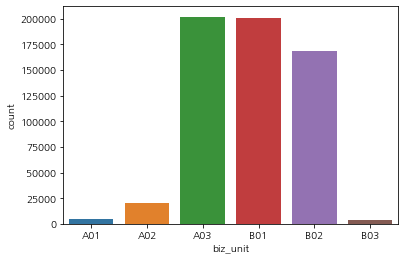

In [16]:
sns.countplot(test['biz_unit'])

## EDA

### 행동 유형

<function matplotlib.pyplot.show(close=None, block=None)>

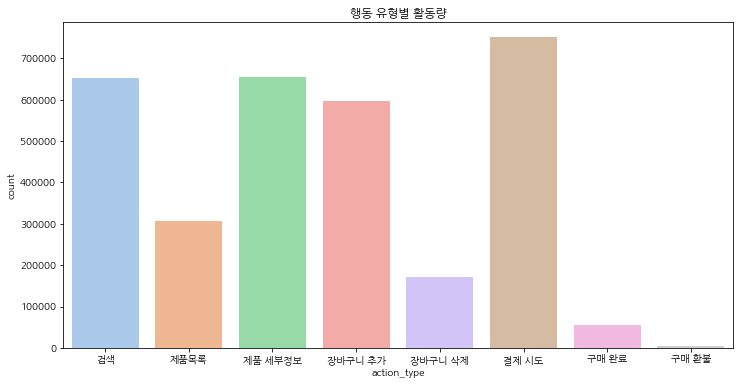

In [13]:
title = '행동 유형별 활동량'
plt.figure(figsize=(12,6))
sns.countplot(x= 'action_type', data=online, palette="pastel")
action_labels = ['검색','제품목록','제품 세부정보','장바구니 추가','장바구니 삭제','결제 시도','구매 완료','구매 환불']
plt.xticks(ticks=np.arange(8), labels = action_labels)
plt.title(title)
plt.savefig(f'../image/2.1.{title}.png', dpi=300)
plt.show

- 그래프를 보면 결제를 시도할 확률이 높지만, 구매완료로 이어지는 것은 생각보다 적습니다.
- 결제 절차가 너무 복잡한 건 아닌지 의문이 듭니다.
- 아니면 결제 시도를 할 때 확정하는 부분은 좀 더 고민을 하는지 생각해볼 수 있습니다.

### 페이지 뷰 수

<function matplotlib.pyplot.show(close=None, block=None)>

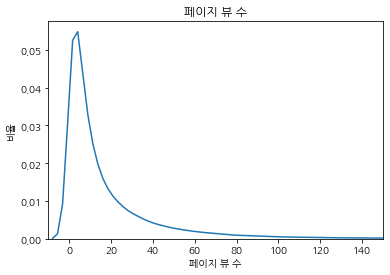

In [15]:
title = '페이지 뷰 수'
sns.kdeplot(online[['clnt_id','sess_id','tot_pag_view_ct']].drop_duplicates()['tot_pag_view_ct'])
plt.xlabel('페이지 뷰 수'); plt.ylabel('비율')
plt.xlim(-10, 150)
plt.title(title)
plt.savefig(f'../image/2.1.{title}.png', dpi=300)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

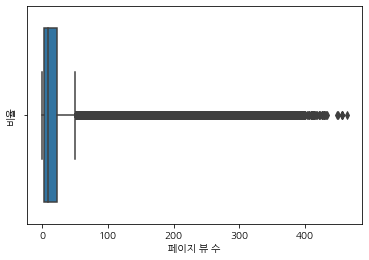

In [16]:
title = '페이지 뷰 수 박스'
sns.boxplot(online[['clnt_id','sess_id','tot_pag_view_ct']].drop_duplicates()['tot_pag_view_ct'])
plt.xlabel('페이지 뷰 수'); plt.ylabel('비율')
plt.savefig(f'../image/2.1.{title}.png', dpi=300)
plt.show

페이지 뷰 수가 과도하게 많은 데이터가 존재합니다.  
이 부분도 어떻게 처리할 지 고민해봐야 겠습니다.

### 총 sess_id 시간

<function matplotlib.pyplot.show(close=None, block=None)>

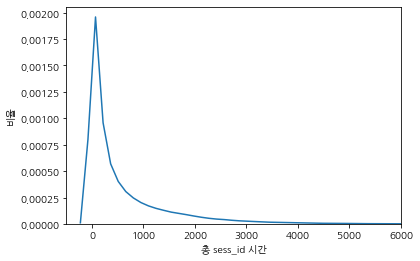

In [17]:
title = '총 sess_id 시간'
sns.kdeplot(online[['clnt_id','sess_id','tot_sess_hr_v']].drop_duplicates()['tot_sess_hr_v'])
plt.xlabel('총 sess_id 시간'); plt.ylabel('비율')
plt.xlim(-500, 6000)
plt.savefig(f'../image/2.1.{title}.png', dpi=300)
plt.show

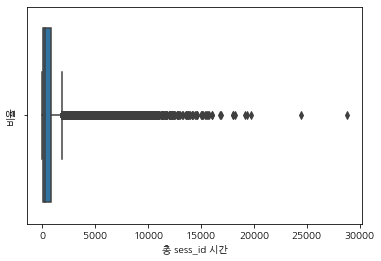

In [18]:
title = '총 sess_id 시간 박스'
sns.boxplot(online[['clnt_id','sess_id','tot_sess_hr_v']].drop_duplicates()['tot_sess_hr_v'])
plt.xlabel('총 sess_id 시간'); plt.ylabel('비율')
plt.savefig(f'../image/2.1.{title}.png', dpi=300)


위의 페이지 뷰 수와 비슷한 양상을 보이고 있습니다. 

## sess_dt별 활동량 추이

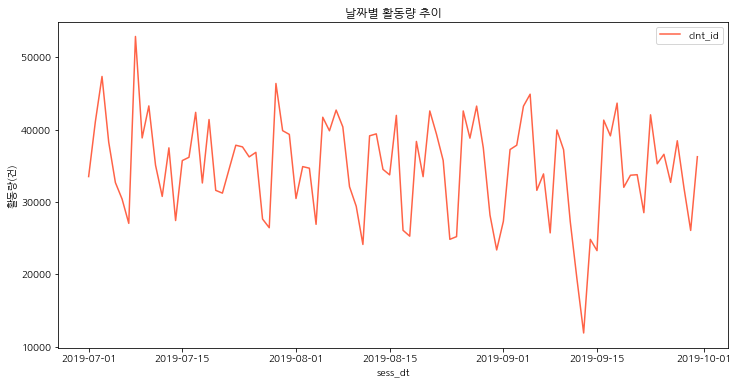

In [19]:
title = '날짜별 활동량 추이'
online_dt = online.copy()

online_dt['sess_dt'] = pd.to_datetime(online['sess_dt'], format='%Y%m%d')

online_dt = online_dt.groupby('sess_dt').size().to_frame('count').reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=online_dt, x='sess_dt', y='count', color='tomato')

plt.title('날짜별 활동량 추이')
plt.xlabel('sess_dt'); plt.ylabel('활동량(건)')
plt.legend(['clnt_id'])
plt.savefig(f'../image/2.1.{title}.png', dpi=300)

plt.show()

2018년 7월 1일은 월요일 입니다.  
주말에 활동량이 약간씩 떨어지는 추이를 보이고 있습니다.  
2주치 데이터 밖에 없어서 결론을 내릴 수는 없지만 공휴일에는 택배가 운영을 안하거나,  
다들 야외활동을 많이 하기 때문에 상대적으로 온라인 활동이 줄어 들 수도 있을 것 같습니다.